### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

In [12]:
faturamento = {nome: df["Preço"].sum() for nome, df in lojas.items()}
import pandas as pd
faturamento = {
    'Loja 1': 1534509.12,
    'Loja 2': 1488459.06,
    'Loja 3': 1464025.03,
    'Loja 4': 1384497.58
}


df_faturamento = pd.DataFrame(faturamento.items(), columns=["Loja", "Faturamento Total (R$)"])
df_faturamento["Faturamento Total (R$)"] = df_faturamento["Faturamento Total (R$)"].map("{:,.2f}".format)

print("\n=== Faturamento Total ===")
print(df_faturamento)


=== Faturamento Total ===
     Loja Faturamento Total (R$)
0  Loja 1           1,534,509.12
1  Loja 2           1,488,459.06
2  Loja 3           1,464,025.03
3  Loja 4           1,384,497.58


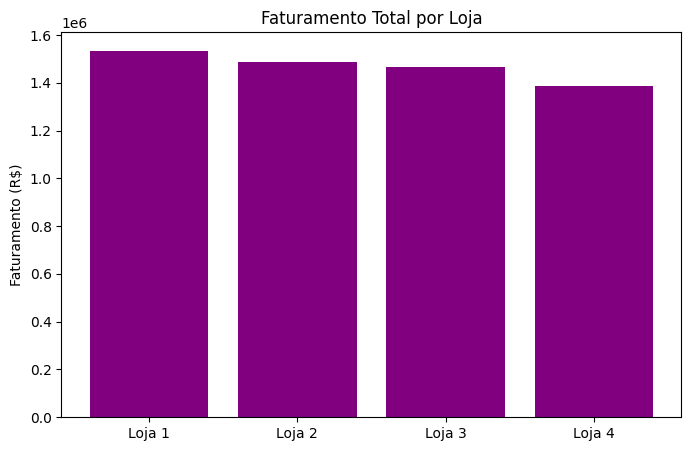

In [15]:
# Gráfico - Faturamento
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(faturamento.keys(), faturamento.values(), color='purple')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.show()

# 2. Vendas por Categoria


In [55]:

categorias_por_loja = {
    nome: df.groupby("Categoria do Produto")["Produto"].count()
    for nome, df in lojas.items()
}

df_categorias = pd.concat(categorias_por_loja, axis=1).fillna(0).astype(int)

print("\n=== Categorias Mais Vendidas ===")
print(df_categorias)


=== Categorias Mais Vendidas ===
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


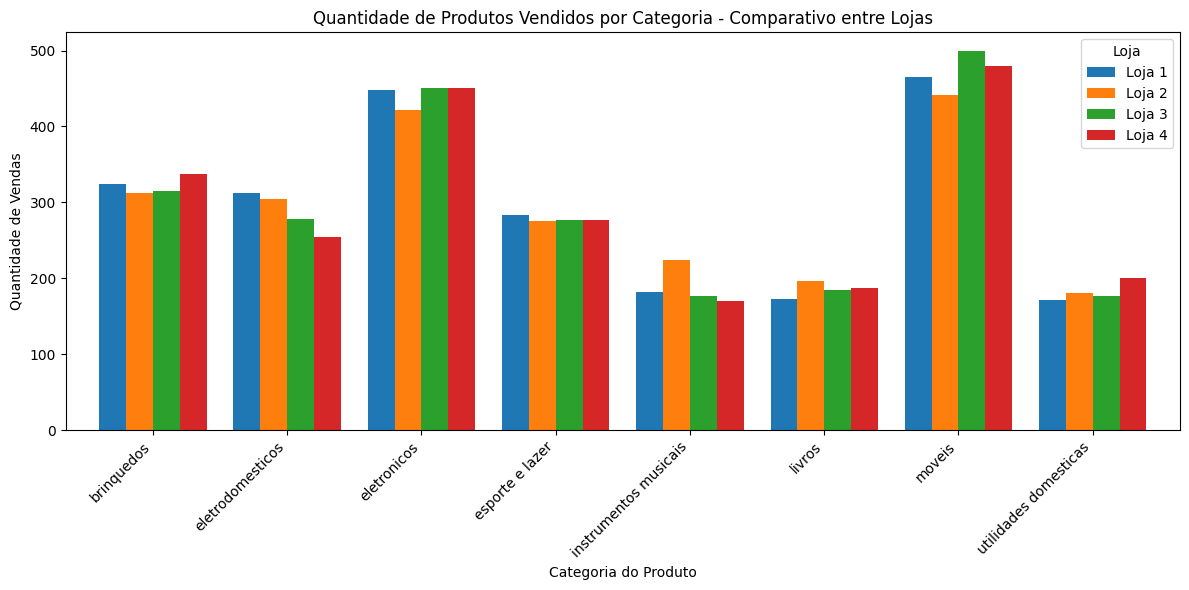

In [28]:
#Geração do gráfico das categorias mais vendidas em cada loja
import matplotlib.pyplot as plt

pd.concat(categorias_por_loja, axis=1) \
    .fillna(0).astype(int) \
    .plot(kind="bar", figsize=(12, 6), width=0.8)

plt.title("Quantidade de Produtos Vendidos por Categoria - Comparativo entre Lojas")
plt.ylabel("Quantidade de Vendas")
plt.xlabel("Categoria do Produto")
plt.legend(title="Loja")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [35]:
avaliacoes_medias = {nome: df["Avaliação da compra"].mean()
                     for nome, df in lojas.items()}

df_avaliacoes = pd.DataFrame(avaliacoes_medias.items(), columns=["Loja", "Média Avaliação"])
df_avaliacoes["Média Avaliação"] = df_avaliacoes["Média Avaliação"].round(2)
media_geral = df_avaliacoes["Média Avaliação"].mean()

print("\n=== Média das Avaliações ===")
print(df_avaliacoes)


=== Média das Avaliações ===
     Loja  Média Avaliação
0  Loja 1             3.98
1  Loja 2             4.04
2  Loja 3             4.05
3  Loja 4             4.00


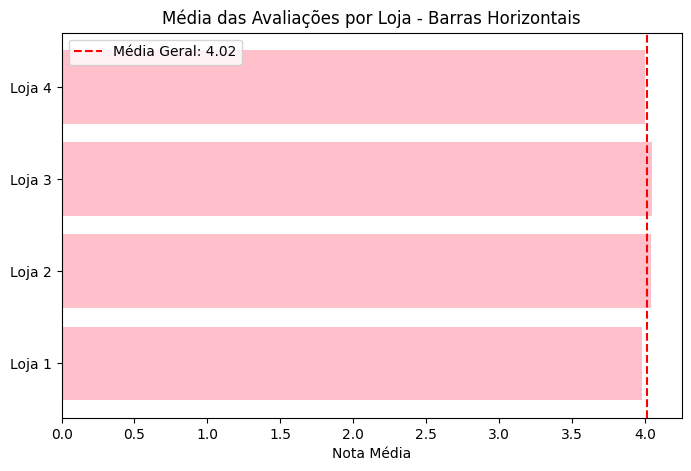

In [37]:
#Gráfico das médias das avaliações

plt.figure(figsize=(8, 5))
plt.barh(df_avaliacoes["Loja"], df_avaliacoes["Média Avaliação"], color="pink")
plt.axvline(media_geral, color="red", linestyle="--", label=f"Média Geral: {media_geral:.2f}")
plt.title("Média das Avaliações por Loja - Barras Horizontais")
plt.xlabel("Nota Média")
plt.legend()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [39]:
produtos_vendidos = {
    nome: df["Produto"].value_counts()
    for nome, df in lojas.items()
}
produtos_mais_menos = {
    nome: {
        "mais_vendido": contagem.idxmax(),
        "qtd_mais_vendido": contagem.max(),
        "menos_vendido": contagem.idxmin(),
        "qtd_menos_vendido": contagem.min()
    }
    for nome, contagem in produtos_vendidos.items()
}

df_produtos = pd.DataFrame(produtos_mais_menos).T.reset_index()
df_produtos.columns = ["Loja", "Mais Vendido", "Qtd Mais Vendido", "Menos Vendido", "Qtd Menos Vendido"]

print("\n=== Produtos Mais e Menos Vendidos ===")
print(df_produtos)


=== Produtos Mais e Menos Vendidos ===
     Loja              Mais Vendido Qtd Mais Vendido      Menos Vendido  \
0  Loja 1               Micro-ondas               60            Headset   
1  Loja 2  Iniciando em programação               65  Jogo de tabuleiro   
2  Loja 3             Kit banquetas               57   Blocos de montar   
3  Loja 4                  Cama box               62           Guitarra   

  Qtd Menos Vendido  
0                33  
1                32  
2                35  
3                33  


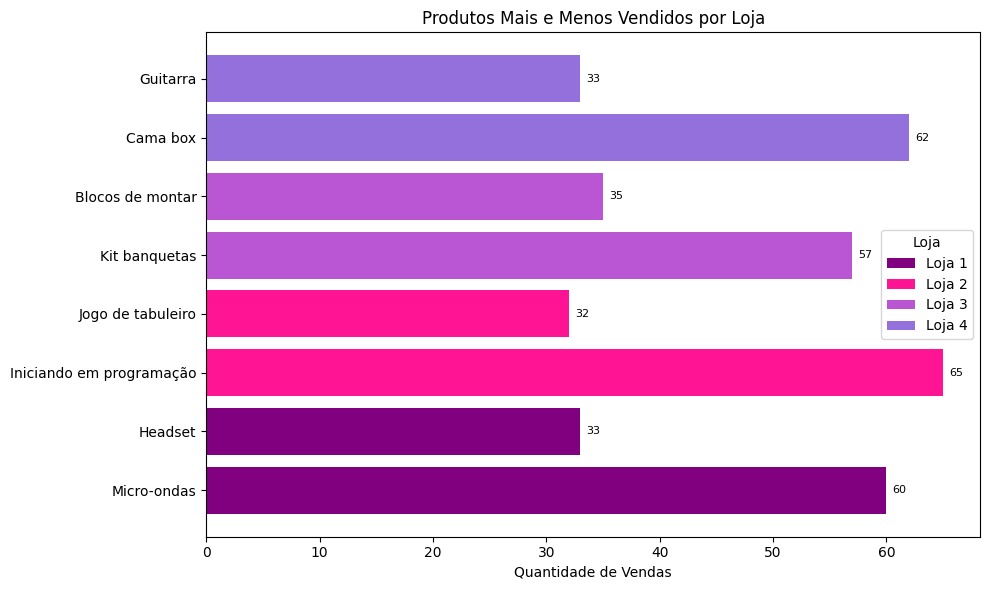

In [51]:
#Gráfico dos produtos mais e menos vendidos

mais = df_produtos[["Loja", "Mais Vendido", "Qtd Mais Vendido"]] \
    .rename(columns={"Mais Vendido": "Produto", "Qtd Mais Vendido": "Quantidade"})
mais["Tipo"] = "Mais Vendido"

menos = df_produtos[["Loja", "Menos Vendido", "Qtd Menos Vendido"]] \
    .rename(columns={"Menos Vendido": "Produto", "Qtd Menos Vendido": "Quantidade"})
menos["Tipo"] = "Menos Vendido"

df_long = pd.concat([mais, menos])


cores_lojas = {
    "Loja 1": "purple",
    "Loja 2": "deeppink",
    "Loja 3": "mediumorchid",
    "Loja 4": "mediumpurple"
}

plt.figure(figsize=(10, 6))


for loja in df_long["Loja"].unique():
    subset = df_long[df_long["Loja"] == loja]
    bars = plt.barh(subset["Produto"], subset["Quantidade"], color=cores_lojas[loja], label=loja)

    for bar in bars:
        plt.text(bar.get_width() + 0.5,
                 bar.get_y() + bar.get_height()/2,
                 int(bar.get_width()),
                 va='center', fontsize=8)

plt.xlabel("Quantidade de Vendas")
plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.legend(title="Loja")
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [53]:
frete_medio = {nome: df["Frete"].mean() for nome, df in lojas.items()}

df_frete = pd.DataFrame(frete_medio.items(), columns=["Loja", "Frete Médio (R$)"])
df_frete["Frete Médio (R$)"] = df_frete["Frete Médio (R$)"].map("{:,.2f}".format)

print("\n=== Custo Médio de Frete ===")
print(df_frete)



=== Custo Médio de Frete ===
     Loja Frete Médio (R$)
0  Loja 1            34.69
1  Loja 2            33.62
2  Loja 3            33.07
3  Loja 4            31.28


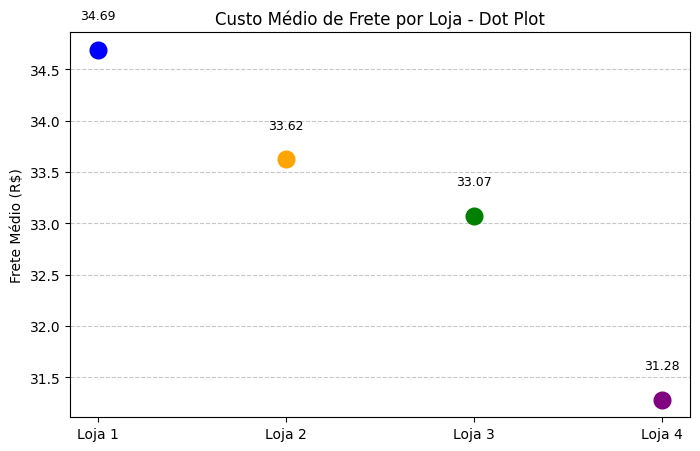

In [56]:
cores_lojas = {
    "Loja 1": "blue",
    "Loja 2": "orange",
    "Loja 3": "green",
    "Loja 4": "purple"
}

plt.figure(figsize=(8, 5))

for loja, valor in frete_medio.items():
    plt.plot(loja, valor, 'o', markersize=12, color=cores_lojas[loja])
    plt.text(loja, valor + 0.3, f"{valor:.2f}", ha='center', fontsize=9)

plt.title("Custo Médio de Frete por Loja - Dot Plot")
plt.ylabel("Frete Médio (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Relatório

Com base nos dados extraídos e demonstrados nas análises, a avaliação de desempenho das quatro lojas da rede considerou indicadores essenciais, como faturamento, satisfação dos clientes, custo médio de frete e perfil de vendas.

**No faturamento**, a Loja 4 apresentou a menor receita, ficando ficando bem abaixo das demais, especialmente da Loja 1, líder no quesito. Isso indica menor volume de vendas.

**Quanto à satisfação dos clientes**, as notas médias ficaram próximas de 4 em todas as lojas, com leve destaque para a Loja 3 (4,05). A Loja 4 obteve 4,00, o que, embora não represente insatisfação, não demonstra vantagem competitiva.

Em relação ao custo médio de frete, a Loja 4 apresentou o menor valor (R$ 31,28), o que poderia ser um ponto positivo. No entanto, essa vantagem não se refletiu em um aumento de faturamento.

O mix de produtos também revela um cenário desfavorável para a Loja 4. Apesar de ter como produto mais vendido a cama box (62 unidades), seu portfólio apresenta menor variedade de itens de alta rotatividade quando comparado às outras lojas, que diversificam mais os produtos de maior saída.


Com base nesta análise, a Loja 4 é a candidata mais indicada para ser vendida. Apesar de possuir um frete competitivo, ela combina:


*   Menor faturamento da rede
*   Avaliação reduzida em relação äs outras lojas
*   Mix de produtos menos diversificado e com menor potencial de giro


Esses fatores sugerem que a Loja 4 pode estar localizada em um mercado de menor demanda ou enfrentar barreiras estruturais que dificultariam seu crescimento sem investimentos significativos.


